## Links úteis:
- https://sbert.net/docs/cross_encoder/pretrained_models.html
- https://sbert.net/docs/cross_encoder/training_overview.html#why-finetune
- https://huggingface.co/cross-encoder/ms-marco-TinyBERT-L2-v2
- https://huggingface.co/cross-encoder/models?sort=downloads
- https://sbert.net/examples/cross_encoder/training/rerankers/README.html
- https://github.com/UKPLab/sentence-transformers/tree/master/examples/cross_encoder/training/rerankers
- https://sbert.net/docs/package_reference/cross_encoder/losses.html#lambdaloss
- https://sbert.net/docs/package_reference/cross_encoder/losses.html

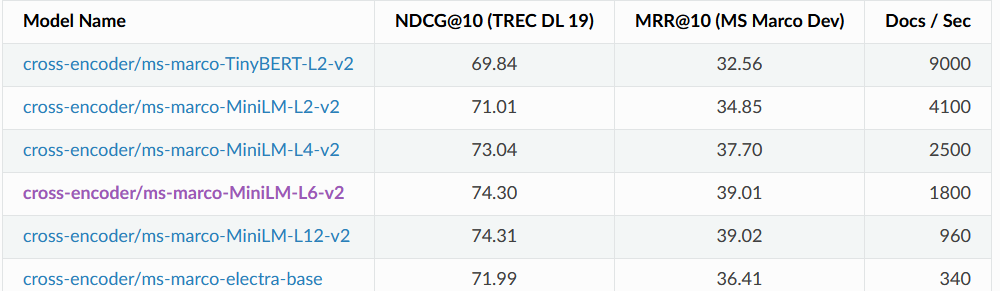

In [14]:
from sentence_transformers import CrossEncoder

In [15]:
# Load a pre-trained CrossEncoder model
model = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")

# Predict scores for a pair of sentences
scores = model.predict([
    ("How many people live in Berlin?", "Berlin had a population of 3,520,031 registered inhabitants in an area of 891.82 square kilometers."),
    ("How many people live in Berlin?", "Berlin is well known for its museums."),
])
scores

array([ 8.607141, -4.320078], dtype=float32)

In [19]:
# Load a pre-trained CrossEncoder model
model = CrossEncoder("models/TinyBERT-ms-marco-L4")

# Rank a list of passages for a query
query = "How many people live in Berlin?"
passages = [
    "Berlin had a population of 3,520,031 registered inhabitants in an area of 891.82 square kilometers.",
    "Berlin is well known for its museums.",
    "In 2014, the city state Berlin had 37,368 live births (+6.6%), a record number since 1991.",
    "The urban area of Berlin comprised about 4.1 million people in 2014, making it the seventh most populous urban area in the European Union.",
    "The city of Paris had a population of 2,165,423 people within its administrative city limits as of January 1, 2019",
    "An estimated 300,000-420,000 Muslims reside in Berlin, making up about 8-11 percent of the population.",
    "Berlin is subdivided into 12 boroughs or districts (Bezirke).",
    "In 2015, the total labour force in Berlin was 1.85 million.",
    "In 2013 around 600,000 Berliners were registered in one of the more than 2,300 sport and fitness clubs.",
    "Berlin has a yearly total of about 135 million day visitors, which puts it in third place among the most-visited city destinations in the European Union.",
]
ranks = model.rank(query, passages)

# Print the scores
print("Query:", query)
for rank in ranks:
    print(f"{rank['score']:.2f}\t{passages[rank['corpus_id']]}")

Query: How many people live in Berlin?
0.98	Berlin had a population of 3,520,031 registered inhabitants in an area of 891.82 square kilometers.
0.98	An estimated 300,000-420,000 Muslims reside in Berlin, making up about 8-11 percent of the population.
0.96	The urban area of Berlin comprised about 4.1 million people in 2014, making it the seventh most populous urban area in the European Union.
0.89	In 2014, the city state Berlin had 37,368 live births (+6.6%), a record number since 1991.
0.04	In 2013 around 600,000 Berliners were registered in one of the more than 2,300 sport and fitness clubs.
0.01	Berlin has a yearly total of about 135 million day visitors, which puts it in third place among the most-visited city destinations in the European Union.
0.01	In 2015, the total labour force in Berlin was 1.85 million.
0.00	The city of Paris had a population of 2,165,423 people within its administrative city limits as of January 1, 2019
0.00	Berlin is well known for its museums.
0.00	Berlin 

In [17]:
#model = CrossEncoder("cross-encoder/ms-marco-MiniLM-L2-v2")
#save_path = "models/MiniLM-ms-marco-L2-v2"
#model.save_pretrained(save_path)